### On the whole Auth

In [58]:
# install.packages("svMisc")
library(svMisc)

In [49]:
setwd("D://LA//ATI Data//Summaries//Just_Auth")
df<- read.table(file="LA.txt", header=T, sep=",")
df<- df[, -1]
Auth <- df

In [2]:
head(df)

UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
User035855,Comp808475,Comp081330,TGS,0,17
Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350
User762066,Comp306129,ActiveDirectory,TGS,0,22
User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35
User043263,Comp883307,Comp384394,TGS,0,2
User631552,Comp621781,Comp915658,NetworkLogon,0,1


[1] 13

[1] 2


                  Batch       CachedInteractive CachedRemoteInteractive 
                  11543                   26862                       2 
       InteractiveLogon            NetworkLogon       RemoteInteractive 
                 286631                 5283750                   37078 
   ScreensaverDismissed      ScreensaverInvoked                 Service 
                 173773                  170415                   13412 
                    TGS                     TGT         WorkstationLock 
                7201544                 1823393                  409884 
      WorkstationUnlock 
                 515394 


       0        1 
15723710   229971 

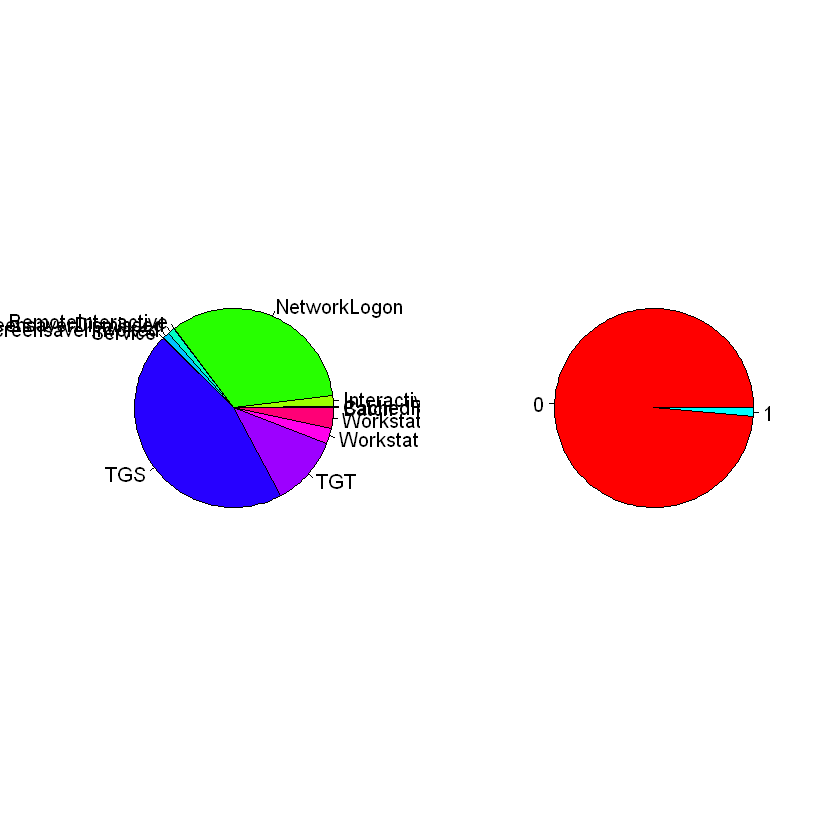

In [3]:
length(unique(df[,4]))
length(unique(df[,5]))
cat("\n")
table(df[,4])
table(df[,5])
cat("\n")

op <- par(mfrow=c(1,2))
pie(table(df[,4]), col=rainbow(13))
pie(table(df[,5]), col=rainbow(2))
par(op)

In [41]:
N1<- nrow(df)*56/90
Auth1 <- df[as.numeric(rownames(df))<=N1, ]

N3 <- nrow(df)*83/90
Auth3 <- df[as.numeric(rownames(df))>=N3, ]

Auth2 <- df[as.numeric(rownames(df))>N1 & as.numeric(rownames(df))<N3, ]

In [5]:
Score <- rep(0, times=nrow(Auth1))
Auth1<- cbind(Auth1, Score)

Score <- rep(0, times=nrow(Auth3))
Auth3<- cbind(Auth3, Score)

In [6]:
head(Auth1)
dim(Auth1)
cat("\n")
head(Auth3)
dim(Auth3)
cat("\n")
head(Auth2)

UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount,Score
User035855,Comp808475,Comp081330,TGS,0,17,0
Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350,0
User762066,Comp306129,ActiveDirectory,TGS,0,22,0
User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35,0
User043263,Comp883307,Comp384394,TGS,0,2,0
User631552,Comp621781,Comp915658,NetworkLogon,0,1,0


[1] 9926734       7

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount,Score
14712840,User997660,Comp296089,Comp370444,NetworkLogon,0,24,0
14712841,User981214,Comp107130,Comp916004,NetworkLogon,0,9,0
14712842,Comp729957$,Comp729957,ActiveDirectory,TGS,0,33,0
14712843,Comp036555$,Comp036555,ActiveDirectory,TGT,0,11,0
14712844,User429099,Comp916004,Comp916004,NetworkLogon,0,654,0
14712845,Comp793165$,Comp793165,Comp793165,TGS,0,24,0


[1] 1240842       7

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
9926735,Comp791833$,Comp791833,ActiveDirectory,TGS,0,20
9926736,User504828,Comp437074,Comp479002,NetworkLogon,0,34
9926737,User196062,Comp916004,ActiveDirectory,TGT,0,16
9926738,User920971,Comp559398,ActiveDirectory,TGS,0,24
9926739,Comp625078$,Comp625078,ActiveDirectory,TGT,0,26
9926740,User325667,Comp052885,None,InteractiveLogon,0,1


In [7]:
df<- Auth2

In [16]:
setwd("D://LA//ATI Data")
AU <- read.table(file="AuthUserNames.txt", header=F)
AU <- as.vector(AU$V1)
AU <- unique(AU)

#### Implementing the Decision Tree from scratch

In [25]:
df[1,]

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
9926735,Comp791833$,Comp791833,ActiveDirectory,TGS,0,20


In [10]:
g<- grep(pattern='Comp', x=df$DstDevice)
# head(g)
SpecialDest <- df$DstDevice[-g]
head(SpecialDest)

[1] ActiveDirectory ActiveDirectory ActiveDirectory ActiveDirectory
[5] None            ActiveDirectory
14000 Levels: ActiveDirectory Comp000082 Comp000116 Comp000187 ... None

In [1]:
c<- vector(len=nrow(df))

for(i in 1:nrow(df)) {
    
    progress(i)
    
    if(df[i,]$UserName%in%AU==FALSE) {
        c[i]<- 0
        }

    if(df[i,]$UserName%in%AU==TRUE) {
        c[i]<- 1
        df_temp <- df[df$UserName==df[i,]$UserName, ]
        df_temp_n<- df_temp[df_temp$DstDevice=='None', ]
        if(df[i,]$Failure==1) { c[i]<- 2+c[i] }
        if(length(unique(df_temp_n$SrcDevice))>=4)
            { c[i] <- c[i] + 1 }
        t<- table(df_temp$DstDevice)
        t<- t[order(t, decreasing=FALSE)]
        if(t[4]==1) { c[i]<- c[i] + 1 }
        g<- grep(pattern='Comp', x=df_temp$DstDevice)
        SpecialDest <- df_temp$DstDevice[-g]
        if(df[i,]$DstDevice%in%SpecialDest==TRUE & nrow(df_temp[df_temp$DstDevice==df[i,]$DstDevice, ])/nrow(df_temp)*100>=5)
            { c[i] <- c[i] + 1}
        if(df[i,]$AuthType=='InteractiveLogon') {
            dt<- df_temp[df_temp$AuthType=='InteractiveLogon', ]
            if(sum(dt$Failure)/nrow(dt)*100>=5)
                { c[i] <- c[i] + 1 }
            }
        if(df[i,]$AuthType=='NetworkLogon') {
            dt<- df_temp[df_temp$AuthType=='NetworkLogon', ]
            if(sum(dt$Failure)/nrow(dt)*100>=10)
                { c[i] <- c[i] + 1 }
            }
        if(df[i,]$AuthType=='Batch') {
            dt<- df_temp[df_temp$AuthType=='Batch', ]
            if(sum(dt$Failure)/nrow(dt)*100>=50)
                { c[i <- c[i] + 1] }
            }
         if(df[i,]$AuthType=='Service') {
            dt<- df_temp[df_temp$AuthType=='Service', ]
            if(sum(dt$Failure)/nrow(dt)*100>=50)
                { c[i] <- c[i] + 1 }
             }
        if(df[i,]$AuthType=='WorkstationUnlock') {
            dt<- df_temp[df_temp$AuthType=='WorkstationUnlock', ]
            if(sum(dt$Failure)/nrow(dt)*100>=10)
                { c[i] <- c[i] +1 }
            }
        if(df[i,]$AuthType=='RemoteInteractive') {
            dt<- df_temp[df_temp$AuthType=='RemoteInteractive', ]
            if(length(unique(dt$SrcDevice))>=10)
                { c[i]<- c[i] + 1 }
            }
        if(df[i,]$AuthType=='CachedInteractive') {
            dt<- df_temp[df_temp$AuthType=='CachedInteractive', ]
            if(sum(dt$Failure)/nrow(dt)*100>=5)
                { c[i]<- c[i] + 1 }
            }
        if(df[i,]$Failure==1) {
            if(df[i,]$DailyCount<IQR(df$DailyCount))
                { c[i] <- c[i] + 1 }
            }
    }
    
        }

ERROR: Error in vector(len = nrow(df)): invalid 'length' argument


In [36]:
table(c)

c
      0       1       2       3       4       5       6       7 
4739741   14780   16275   11337    1962     347    1126     537 

In [31]:
t<- table(c)
t<- t[-1]
identical(sum(t), nrow(df[df$UserName%in%AU, ]))
                            ## Should be TRUE

[1] TRUE

**Trying out a couple of usernames**

In [28]:
df1 <- df[df$UserName=='User035855', ]
head(df1)
dim(df1)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
10084231,User035855,Comp808475,Comp081330,TGS,0,11
10093026,User035855,Comp808475,EnterpriseAppServer,NetworkLogon,0,26
10094092,User035855,Comp808475,Comp370444,NetworkLogon,0,23
10094218,User035855,Comp808475,Comp915658,TGS,0,2
10105736,User035855,Comp808475,None,WorkstationUnlock,1,2
10109868,User035855,Comp808475,ActiveDirectory,NetworkLogon,0,180


[1] 350   6

In [30]:
head(df1)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
10084231,User035855,Comp808475,Comp081330,TGS,0,11
10093026,User035855,Comp808475,EnterpriseAppServer,NetworkLogon,0,26
10094092,User035855,Comp808475,Comp370444,NetworkLogon,0,23
10094218,User035855,Comp808475,Comp915658,TGS,0,2
10105736,User035855,Comp808475,None,WorkstationUnlock,1,2
10109868,User035855,Comp808475,ActiveDirectory,NetworkLogon,0,180


In [32]:
dfn <- df1[df1$DstDevice=='None', ]
dfn

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
10105736,User035855,Comp808475,None,WorkstationUnlock,1,2
10134974,User035855,Comp808475,None,InteractiveLogon,1,1
10183431,User035855,Comp808475,None,WorkstationLock,0,7
10208584,User035855,Comp808475,None,WorkstationUnlock,0,19
10254596,User035855,Comp808475,None,InteractiveLogon,0,1
10403996,User035855,Comp808475,None,WorkstationLock,0,4
10428619,User035855,Comp808475,None,WorkstationUnlock,0,12
10473613,User035855,Comp808475,None,InteractiveLogon,0,1
10543525,User035855,Comp808475,None,WorkstationUnlock,0,14
10555080,User035855,Comp808475,None,WorkstationUnlock,1,1


In [44]:
df_in <- df[df$AuthType=='CachedRemoteInteractive' & df$Failure==1, ]
dim(df_in)

[1] 0 6

**Analysis of AuthType outcome**

In [71]:
data<- as.data.frame(matrix(c("TGT", "NO", "-",
                 "TGS", "NO", "-",
                 "InteractiveLogon", "YES", "Rare(<5%)",
                 "NetworkLogon", "YES", "Rare(<10%)",
                 "Batch", "YES", "Unimportant",
                 "Service", "YES", "Unimportant",
                 "WorkstationLock", "NO", "-",
                 "WorkstationUnlock", "YES", "Rare(<10%)",
                 "ScreensaverInvoked", "NO", "-",
                 "ScreensaverDismissed", "NO", "-",
                 "RemoteInteractive", "YES", "Never happened",
                 "CachedInteractive", "YES", "Rare(<5%)",
                 "CachedRemoteInteractive", "YES", "Never happened"),
                 byrow=TRUE, ncol=3))
colnames(data) <- c("Type", "CanItFail", "HowOftenIfYes")

In [72]:
data

Type,CanItFail,HowOftenIfYes
TGT,NO,-
TGS,NO,-
InteractiveLogon,YES,Rare(<5%)
NetworkLogon,YES,Rare(<10%)
Batch,YES,Unimportant
Service,YES,Unimportant
WorkstationLock,NO,-
WorkstationUnlock,YES,Rare(<10%)
ScreensaverInvoked,NO,-
ScreensaverDismissed,NO,-


In [75]:
mytable <- xtabs(~Type + CanItFail, data=data)
ftable(mytable)

                        CanItFail NO YES
Type                                    
Batch                              0   1
CachedInteractive                  0   1
CachedRemoteInteractive            0   1
InteractiveLogon                   0   1
NetworkLogon                       0   1
RemoteInteractive                  0   1
ScreensaverDismissed               1   0
ScreensaverInvoked                 1   0
Service                            0   1
TGS                                1   0
TGT                                1   0
WorkstationLock                    1   0
WorkstationUnlock                  0   1

In [79]:
df_temp <- df[df$UserName==df[1,]$UserName, ]

In [83]:
IQR(df$DailyCount)

[1] 23

In [43]:
Auth2 <- cbind(Auth2, Score=c)
head(Auth2, 10)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount,Score
9926735,Comp791833$,Comp791833,ActiveDirectory,TGS,0,20,0
9926736,User504828,Comp437074,Comp479002,NetworkLogon,0,34,0
9926737,User196062,Comp916004,ActiveDirectory,TGT,0,16,0
9926738,User920971,Comp559398,ActiveDirectory,TGS,0,24,0
9926739,Comp625078$,Comp625078,ActiveDirectory,TGT,0,26,0
9926740,User325667,Comp052885,None,InteractiveLogon,0,1,0
9926741,Comp016726$,Comp016726,Comp016726,TGS,0,43,0
9926742,User548312,Comp232667,Comp253429,TGS,0,2,0
9926743,Comp497156$,Comp497156,ActiveDirectory,TGS,0,29,0
9926744,User688207,Comp602542,Comp370444,TGS,0,1,0


In [44]:
Auth_new <- rbind(Auth1, Auth2, Auth3)

In [46]:
head(Auth_new)

UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount,Score
User035855,Comp808475,Comp081330,TGS,0,17,0
Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350,0
User762066,Comp306129,ActiveDirectory,TGS,0,22,0
User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35,0
User043263,Comp883307,Comp384394,TGS,0,2,0
User631552,Comp621781,Comp915658,NetworkLogon,0,1,0


In [51]:
print(paste("Verdict for integrity of binding is:", identical(nrow(Auth_new), nrow(Auth))))    ## Should be TRUE

[1] "Verdict for integrity of binding is: TRUE"


In [52]:
table(Auth_new$Score)


       0        1        2        3        4        5        6        7 
15907317    14780    16275    11337     1962      347     1126      537 

In [54]:
# write.table(x=Auth_new, file="RankedAuthData.txt")
# write.csv(x=Auth_new, file="RankedAuthData.csv")

In [55]:
ct<- as.data.frame(c)
head(ct)

c
0
0
0
0
0
0


In [56]:
# write.table(x=ct, file="AuthScores.txt")